In [5]:
setwd('/import/liujing/data2/scrna/')

In [9]:
library(Seurat)

In [10]:
sce = readRDS('scRNA.xifen.rds')

In [4]:
write.csv(t(as.matrix(sce@assays$RNA@counts)),file = "for.scenic.data.csv")

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 15.4 GiB"


### 在for.scenic.data.csv 同目錄下：
# cat >> change.py 
<!-- import os,sys
os.getcwd()
os.listdir(os.getcwd())     

import loompy as lp;
import numpy as np;
import scanpy as sc;
x=sc.read_csv("for.scenic.data.csv");
row_attrs = {"Gene": np.array(x.var_names),};
col_attrs = {"CellID": np.array(x.obs_names)};
lp.create("sample.loom",x.X.transpose(),row_attrs,c -->ol_attrs);

In [14]:
#cat >scenic.bash

In [ ]:
python change.py

##运行pySCENIC
# 不同物种的数据库不一样，这里是人类是human 
dir=/import/DB/cistarget/ #改成自己的目录
tfs=$dir/hs_hgnc_tfs.txt
feather=$dir/hg19-tss-centered-10kb-7species.mc9nr.feather
tbl=$dir/motifs-v9-nr.hgnc-m0.001-o0.0.tbl
# 一定要保证上面的数据库文件完整无误哦 
input_loom=./sample.loom
ls $tfs  $feather  $tbl  

#2.1 grn
pyscenic grn \
--num_workers 50 \
--output adj.sample.tsv \
--method grnboost2 \
sample.loom \
$tfs #转录因子文件，1839个基因的名字列表

#2.2 cistarget
pyscenic ctx \
adj.sample.tsv $feather \
--annotations_fname $tbl \
--expression_mtx_fname $input_loom  \
--mode "dask_multiprocessing" \
--output reg.csv \
--num_workers 30  \
--mask_dropouts

#2.3 AUCell
pyscenic aucell \
$input_loom \
reg.csv \
--output out_SCENIC.loom \
--num_workers 30

In [ ]:
# bash scenic.bash

### 读入数据

In [2]:
library(Seurat)
library(SCopeLoomR)
library(AUCell)
library(SCENIC)
library(dplyr)
library(KernSmooth)
library(RColorBrewer)
library(plotly)
library(BiocParallel)
library(grid)
library(ComplexHeatmap)
library(data.table)
library(scRNAseq)
library(patchwork)
library(ggplot2) 
library(stringr)
library(circlize)

In [7]:
loom <- open_loom('out_SCENIC.loom') 

In [8]:


regulons_incidMat <- get_regulons(loom, column.attr.name="Regulons")
regulons_incidMat[1:4,1:4] 
regulons <- regulonsToGeneLists(regulons_incidMat)
regulonAUC <- get_regulons_AUC(loom,column.attr.name='RegulonsAUC')
regulonAucThresholds <- get_regulon_thresholds(loom)
tail(regulonAucThresholds[order(as.numeric(names(regulonAucThresholds)))])

embeddings <- get_embeddings(loom)  
close_loom(loom)

rownames(regulonAUC)
names(regulons)

,OR4F16,TNFRSF4,TNFRSF18,ATAD3B
ARID3A(+),0,0,0,0
ARNT(+),0,0,0,0
ASCL2(+),0,0,0,0
ATF1(+),0,0,0,0


0.508034960350556 0.541829857371987 0.652297209184865 0.667516053367772 
      "ZNF787(+)"         "BCL6(+)"          "SP1(+)"         "FOSB(+)" 
0.768694480651953 0.818493389548257 
      "STAT5B(+)"         "KLF6(+)"

[1] "ARID3A(+)"  "ARNT(+)"    "ASCL2(+)"   "ATF1(+)"    "ATF3(+)"   
  [6] "ATF4(+)"    "ATF6B(+)"   "BACH1(+)"   "BCL3(+)"    "BCL6(+)"   
 [11] "BCLAF1(+)"  "BDP1(+)"    "BHLHE40(+)" "BRF1(+)"    "CEBPB(+)"  
 [16] "CEBPD(+)"   "CEBPE(+)"   "CHD2(+)"    "CPEB1(+)"   "CREB1(+)"  
 [21] "CREB3(+)"   "CREM(+)"    "CTCF(+)"    "CUX1(+)"    "CUX2(+)"   
 [26] "DBP(+)"     "DDIT3(+)"   "DEAF1(+)"   "DMRTC2(+)"  "E2F1(+)"   
 [31] "E2F2(+)"    "E2F3(+)"    "E2F4(+)"    "E2F6(+)"    "E4F1(+)"   
 [36] "EBF1(+)"    "EBF4(+)"    "EGR1(+)"    "EGR3(+)"    "ELF1(+)"   
 [41] "ELF2(+)"    "ELF3(+)"    "ELF4(+)"    "ELK1(+)"    "ELK3(+)"   
 [46] "ELK4(+)"    "EOMES(+)"   "EP300(+)"   "ESRRA(+)"   "ETS1(+)"   
 [51] "ETS2(+)"    "ETV1(+)"    "ETV3(+)"    "ETV5(+)"    "ETV6(+)"   
 [56] "ETV7(+)"    "EZH2(+)"    "FLI1(+)"    "FOS(+)"     "FOSB(+)"   
 [61] "FOSL2(+)"   "FOXD2(+)"   "FOXD4L1(+)" "FOXI1(+)"   "FOXJ2(+)"  
 [66] "FOXJ3(+)"   "FOXK1(+)"   "FOXM1(+)"   "FOXN3(+)"   "FOXO1(+)"  
 [71] "FOXO3(+)"   "FOXO4(+)"   "FOXP1(+)"   "FOXP3(+)"   "FOXP4(+)"  
 [76] "FOXQ1(+)"   "GABPA(+)"   "GABPB1(+)"  "GATA1(+)"   "GATA2(+)"  
 [81] "GCM1(+)"    "GLI1(+)"    "GLIS2(+)"   "GLIS3(+)"   "GMEB1(+)"  
 [86] "GTF2F1(+)"  "GTF3C2(+)"  "HCFC1(+)"   "HDAC2(+)"   "HDAC6(+)"  
 [91] "HES1(+)"    "HIVEP1(+)"  "HMGA1(+)"   "HMGN3(+)"   "HOXA10(+)" 
 [96] "HOXA3(+)"   "HOXA9(+)"   "HOXB2(+)"   "HSF1(+)"    "IKZF1(+)"  
[101] "IKZF4(+)"   "IRF1(+)"    "IRF2(+)"    "IRF3(+)"    "IRF4(+)"   
[106] "IRF5(+)"    "IRF6(+)"    "IRF7(+)"    "IRF8(+)"    "IRF9(+)"   
[111] "JUN(+)"     "JUNB(+)"    "JUND(+)"    "KDM5A(+)"   "KDM5B(+)"  
[116] "KLF13(+)"   "KLF2(+)"    "KLF3(+)"    "KLF5(+)"    "KLF6(+)"   
[121] "LEF1(+)"    "LHX1(+)"    "MAFG(+)"    "MAFK(+)"    "MAX(+)"    
[126] "MEF2A(+)"   "MEF2C(+)"   "MEIS1(+)"   "MGA(+)"     "MLX(+)"    
[131] "MXI1(+)"    "MYC(+)"     "NELFE(+)"   "NFATC2(+)"  "NFE2(+)"   
[136] "NFIA(+)"    "NFIL3(+)"   "NFKB1(+)"   "NFKB2(+)"   "NFYB(+)"   
[141] "NFYC(+)"    "NKX3-1(+)"  "NPDC1(+)"   "NR1H3(+)"   "NR2C1(+)"  
[146] "NR2C2(+)"   "NR2F6(+)"   "NR3C1(+)"   "NR6A1(+)"   "NRF1(+)"   
[151] "NUAK1(+)"   "OLIG2(+)"   "PATZ1(+)"   "PAX5(+)"    "PAX8(+)"   
[156] "PBX1(+)"    "PBX3(+)"    "PHF8(+)"    "PML(+)"     "POLE3(+)"  
[161] "POLR2A(+)"  "POLR3A(+)"  "POU2AF1(+)" "POU2F2(+)"  "POU5F1(+)" 
[166] "PPARD(+)"   "PPARG(+)"   "PRDM1(+)"   "RAD21(+)"   "RARB(+)"   
[171] "RARG(+)"    "RBBP5(+)"   "RCOR1(+)"   "REL(+)"     "RELA(+)"   
[176] "RELB(+)"    "REST(+)"    "RFX1(+)"    "RFX2(+)"    "RFX5(+)"   
[181] "RORB(+)"    "RORC(+)"    "RUNX1(+)"   "RUNX2(+)"   "RUNX3(+)"  
[186] "RXRA(+)"    "RXRB(+)"    "SETDB1(+)"  "SIN3A(+)"   "SMAD9(+)"  
[191] "SMARCA4(+)" "SMARCC2(+)" "SNAI1(+)"   "SOX13(+)"   "SOX4(+)"   
[196] "SOX6(+)"    "SOX7(+)"    "SOX8(+)"    "SP1(+)"     "SP2(+)"    
[201] "SP4(+)"     "SPI1(+)"    "SPIB(+)"    "SREBF1(+)"  "SREBF2(+)" 
[206] "SRF(+)"     "STAT1(+)"   "STAT2(+)"   "STAT3(+)"   "STAT5B(+)" 
[211] "STAT6(+)"   "TAF7(+)"    "TAL1(+)"    "TBL1XR1(+)" "TBX21(+)"  
[216] "TCF3(+)"    "TCF7L2(+)"  "TCFL5(+)"   "TEF(+)"     "TFE3(+)"   
[221] "TFEC(+)"    "TGIF1(+)"   "TGIF2(+)"   "THAP1(+)"   "THRA(+)"   
[226] "USF1(+)"    "USF2(+)"    "VEZF1(+)"   "XRCC4(+)"   "YY1(+)"    
[231] "ZBTB7A(+)"  "ZBTB7B(+)"  "ZFP62(+)"   "ZFY(+)"     "ZNF16(+)"  
[236] "ZNF234(+)"  "ZNF235(+)"  "ZNF250(+)"  "ZNF284(+)"  "ZNF30(+)"  
[241] "ZNF335(+)"  "ZNF384(+)"  "ZNF471(+)"  "ZNF502(+)"  "ZNF546(+)" 
[246] "ZNF589(+)"  "ZNF594(+)"  "ZNF597(+)"  "ZNF669(+)"  "ZNF695(+)" 
[251] "ZNF696(+)"  "ZNF70(+)"   "ZNF76(+)"   "ZNF780B(+)" "ZNF786(+)" 
[256] "ZNF787(+)"  "ZNF831(+)"  "ZNF91(+)"   "ZXDB(+)"

[1] "ARID3A(+)"  "ARNT(+)"    "ASCL2(+)"   "ATF1(+)"    "ATF3(+)"   
  [6] "ATF4(+)"    "ATF6B(+)"   "BACH1(+)"   "BCL3(+)"    "BCL6(+)"   
 [11] "BCLAF1(+)"  "BDP1(+)"    "BHLHE40(+)" "BRF1(+)"    "CEBPB(+)"  
 [16] "CEBPD(+)"   "CEBPE(+)"   "CHD2(+)"    "CPEB1(+)"   "CREB1(+)"  
 [21] "CREB3(+)"   "CREM(+)"    "CTCF(+)"    "CUX1(+)"    "CUX2(+)"   
 [26] "DBP(+)"     "DDIT3(+)"   "DEAF1(+)"   "DMRTC2(+)"  "E2F1(+)"   
 [31] "E2F2(+)"    "E2F3(+)"    "E2F4(+)"    "E2F6(+)"    "E4F1(+)"   
 [36] "EBF1(+)"    "EBF4(+)"    "EGR1(+)"    "EGR3(+)"    "ELF1(+)"   
 [41] "ELF2(+)"    "ELF3(+)"    "ELF4(+)"    "ELK1(+)"    "ELK3(+)"   
 [46] "ELK4(+)"    "EOMES(+)"   "EP300(+)"   "ESRRA(+)"   "ETS1(+)"   
 [51] "ETS2(+)"    "ETV1(+)"    "ETV3(+)"    "ETV5(+)"    "ETV6(+)"   
 [56] "ETV7(+)"    "EZH2(+)"    "FLI1(+)"    "FOS(+)"     "FOSB(+)"   
 [61] "FOSL2(+)"   "FOXD2(+)"   "FOXD4L1(+)" "FOXI1(+)"   "FOXJ2(+)"  
 [66] "FOXJ3(+)"   "FOXK1(+)"   "FOXM1(+)"   "FOXN3(+)"   "FOXO1(+)"  
 [71] "FOXO3(+)"   "FOXO4(+)"   "FOXP1(+)"   "FOXP3(+)"   "FOXP4(+)"  
 [76] "FOXQ1(+)"   "GABPA(+)"   "GABPB1(+)"  "GATA1(+)"   "GATA2(+)"  
 [81] "GCM1(+)"    "GLI1(+)"    "GLIS2(+)"   "GLIS3(+)"   "GMEB1(+)"  
 [86] "GTF2F1(+)"  "GTF3C2(+)"  "HCFC1(+)"   "HDAC2(+)"   "HDAC6(+)"  
 [91] "HES1(+)"    "HIVEP1(+)"  "HMGA1(+)"   "HMGN3(+)"   "HOXA10(+)" 
 [96] "HOXA3(+)"   "HOXA9(+)"   "HOXB2(+)"   "HSF1(+)"    "IKZF1(+)"  
[101] "IKZF4(+)"   "IRF1(+)"    "IRF2(+)"    "IRF3(+)"    "IRF4(+)"   
[106] "IRF5(+)"    "IRF6(+)"    "IRF7(+)"    "IRF8(+)"    "IRF9(+)"   
[111] "JUN(+)"     "JUNB(+)"    "JUND(+)"    "KDM5A(+)"   "KDM5B(+)"  
[116] "KLF13(+)"   "KLF2(+)"    "KLF3(+)"    "KLF5(+)"    "KLF6(+)"   
[121] "LEF1(+)"    "LHX1(+)"    "MAFG(+)"    "MAFK(+)"    "MAX(+)"    
[126] "MEF2A(+)"   "MEF2C(+)"   "MEIS1(+)"   "MGA(+)"     "MLX(+)"    
[131] "MXI1(+)"    "MYC(+)"     "NELFE(+)"   "NFATC2(+)"  "NFE2(+)"   
[136] "NFIA(+)"    "NFIL3(+)"   "NFKB1(+)"   "NFKB2(+)"   "NFYB(+)"   
[141] "NFYC(+)"    "NKX3-1(+)"  "NPDC1(+)"   "NR1H3(+)"   "NR2C1(+)"  
[146] "NR2C2(+)"   "NR2F6(+)"   "NR3C1(+)"   "NR6A1(+)"   "NRF1(+)"   
[151] "NUAK1(+)"   "OLIG2(+)"   "PATZ1(+)"   "PAX5(+)"    "PAX8(+)"   
[156] "PBX1(+)"    "PBX3(+)"    "PHF8(+)"    "PML(+)"     "POLE3(+)"  
[161] "POLR2A(+)"  "POLR3A(+)"  "POU2AF1(+)" "POU2F2(+)"  "POU5F1(+)" 
[166] "PPARD(+)"   "PPARG(+)"   "PRDM1(+)"   "RAD21(+)"   "RARB(+)"   
[171] "RARG(+)"    "RBBP5(+)"   "RCOR1(+)"   "REL(+)"     "RELA(+)"   
[176] "RELB(+)"    "REST(+)"    "RFX1(+)"    "RFX2(+)"    "RFX5(+)"   
[181] "RORB(+)"    "RORC(+)"    "RUNX1(+)"   "RUNX2(+)"   "RUNX3(+)"  
[186] "RXRA(+)"    "RXRB(+)"    "SETDB1(+)"  "SIN3A(+)"   "SMAD9(+)"  
[191] "SMARCA4(+)" "SMARCC2(+)" "SNAI1(+)"   "SOX13(+)"   "SOX4(+)"   
[196] "SOX6(+)"    "SOX7(+)"    "SOX8(+)"    "SP1(+)"     "SP2(+)"    
[201] "SP4(+)"     "SPI1(+)"    "SPIB(+)"    "SREBF1(+)"  "SREBF2(+)" 
[206] "SRF(+)"     "STAT1(+)"   "STAT2(+)"   "STAT3(+)"   "STAT5B(+)" 
[211] "STAT6(+)"   "TAF7(+)"    "TAL1(+)"    "TBL1XR1(+)" "TBX21(+)"  
[216] "TCF3(+)"    "TCF7L2(+)"  "TCFL5(+)"   "TEF(+)"     "TFE3(+)"   
[221] "TFEC(+)"    "TGIF1(+)"   "TGIF2(+)"   "THAP1(+)"   "THRA(+)"   
[226] "USF1(+)"    "USF2(+)"    "VEZF1(+)"   "XRCC4(+)"   "YY1(+)"    
[231] "ZBTB7A(+)"  "ZBTB7B(+)"  "ZFP62(+)"   "ZFY(+)"     "ZNF16(+)"  
[236] "ZNF234(+)"  "ZNF235(+)"  "ZNF250(+)"  "ZNF284(+)"  "ZNF30(+)"  
[241] "ZNF335(+)"  "ZNF384(+)"  "ZNF471(+)"  "ZNF502(+)"  "ZNF546(+)" 
[246] "ZNF589(+)"  "ZNF594(+)"  "ZNF597(+)"  "ZNF669(+)"  "ZNF695(+)" 
[251] "ZNF696(+)"  "ZNF70(+)"   "ZNF76(+)"   "ZNF780B(+)" "ZNF786(+)" 
[256] "ZNF787(+)"  "ZNF831(+)"  "ZNF91(+)"   "ZXDB(+)"

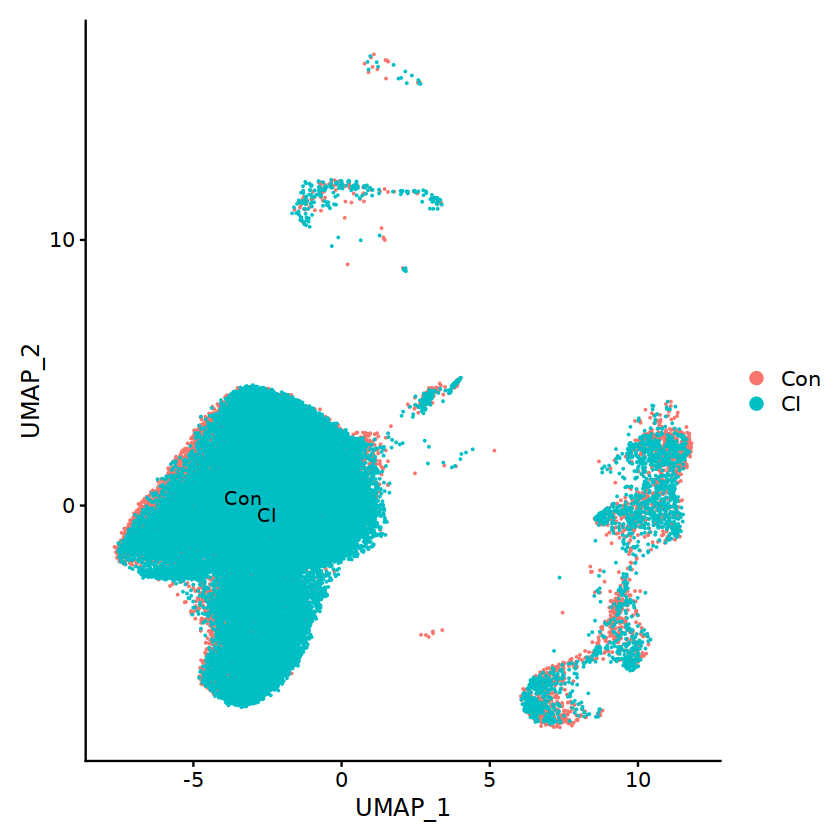

In [11]:
Idents(sce) <- "group"
DimPlot(sce,reduction = "umap",label=T,raster=FALSE) 

In [12]:
sub_regulonAUC <- regulonAUC[,match(colnames(sce),colnames(regulonAUC))]
dim(sub_regulonAUC)
sce

[1]   259 55239

An object of class Seurat 
37487 features across 55239 samples within 1 assay 
Active assay: RNA (37487 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

In [22]:
sce$group = paste0(sce$group,'_',sce$celltype)

In [23]:

#确认是否一致
identical(colnames(sub_regulonAUC), colnames(sce))

cellClusters <- data.frame(row.names = colnames(sce), 
                           seurat_clusters = as.character(sce$group))
cellTypes <- data.frame(row.names = colnames(sce), 
                        celltype = sce$group)
head(cellTypes)
head(cellClusters)
sub_regulonAUC[1:4,1:4] 

#保存一下
# save(sub_regulonAUC,cellTypes,cellClusters,sce,
#      file = 'for_rss_and_visual.Rdata')

[1] TRUE

,celltype
,<chr>
AAATCCTGTAAATAAATAGATAGAGGA_1,Con_Neutrophils
AAATCCTGTAACCAAAGTCTACATGCG_1,Con_Neutrophils
AAATCCTGTAACCAAAGTGATCTCTTA_1,Con_Neutrophils
AAATCCTGTAACCCTCGGATATTGTAA_1,Con_Neutrophils
AAATCCTGTAACCCTCGGCAGGGAGGG_1,Con_Neutrophils
AAATCCTGTAAGAGTAGAACGAACCAG_1,Con_Neutrophils


,seurat_clusters
,<chr>
AAATCCTGTAAATAAATAGATAGAGGA_1,Con_Neutrophils
AAATCCTGTAACCAAAGTCTACATGCG_1,Con_Neutrophils
AAATCCTGTAACCAAAGTGATCTCTTA_1,Con_Neutrophils
AAATCCTGTAACCCTCGGATATTGTAA_1,Con_Neutrophils
AAATCCTGTAACCCTCGGCAGGGAGGG_1,Con_Neutrophils
AAATCCTGTAAGAGTAGAACGAACCAG_1,Con_Neutrophils


AUC for 4 regulons (rows) and 4 cells (columns).

Top-left corner of the AUC matrix:
           cells
regulons    AAATCCTGTAAATAAATAGATAGAGGA_1 AAATCCTGTAACCAAAGTCTACATGCG_1
  ARID3A(+)                   0.225701585                    0.20616885
  ARNT(+)                     0.036594332                    0.09051939
  ASCL2(+)                    0.100853789                    0.10120953
  ATF1(+)                     0.007643292                    0.02773244
           cells
regulons    AAATCCTGTAACCAAAGTGATCTCTTA_1 AAATCCTGTAACCCTCGGATATTGTAA_1
  ARID3A(+)                    0.25508239                   0.196955630
  ARNT(+)                      0.07662161                   0.052469465
  ASCL2(+)                     0.07215700                   0.099667971
  ATF1(+)                      0.03614477                   0.006984117

In [24]:
regulonsToPlot = c('ATF1(+)')
regulonsToPlot %in% row.names(sub_regulonAUC)
sce@meta.data = cbind(sce@meta.data ,t(assay(sub_regulonAUC[regulonsToPlot,])))

# Vis
# p1 = DotPlot(Mic, features = unique(regulonsToPlot)) + RotatedAxis()
# p2 = RidgePlot(Mic, features = regulonsToPlot , ncol = 2) 
# p3 = VlnPlot(Mic, features = regulonsToPlot,pt.size = 0)
# p4 = FeaturePlot(Mic,features = regulonsToPlot)

# wrap_plots(p1,p2,p3,p4)

[1] TRUE

In [25]:
selectedResolution <- "celltype" # select resolution
cellsPerGroup <- split(rownames(cellTypes), 
                       cellTypes[,selectedResolution])

# 去除extened regulons
sub_regulonAUC <- sub_regulonAUC[onlyNonDuplicatedExtended(rownames(sub_regulonAUC)),] 
dim(sub_regulonAUC)

[1]   259 55239

In [26]:
regulonActivity_byGroup <- sapply(cellsPerGroup,
                                  function(cells) 
                                    rowMeans(getAUC(sub_regulonAUC)[,cells]))

In [27]:
regulonActivity_byGroup_Scaled <- t(scale(t(regulonActivity_byGroup),
                                          center = T, scale=T)) 

In [28]:
regulonActivity_byGroup_Scaled=na.omit(regulonActivity_byGroup_Scaled)

In [29]:
options(repr.plot.width = 25,repr.plot.height = 5)

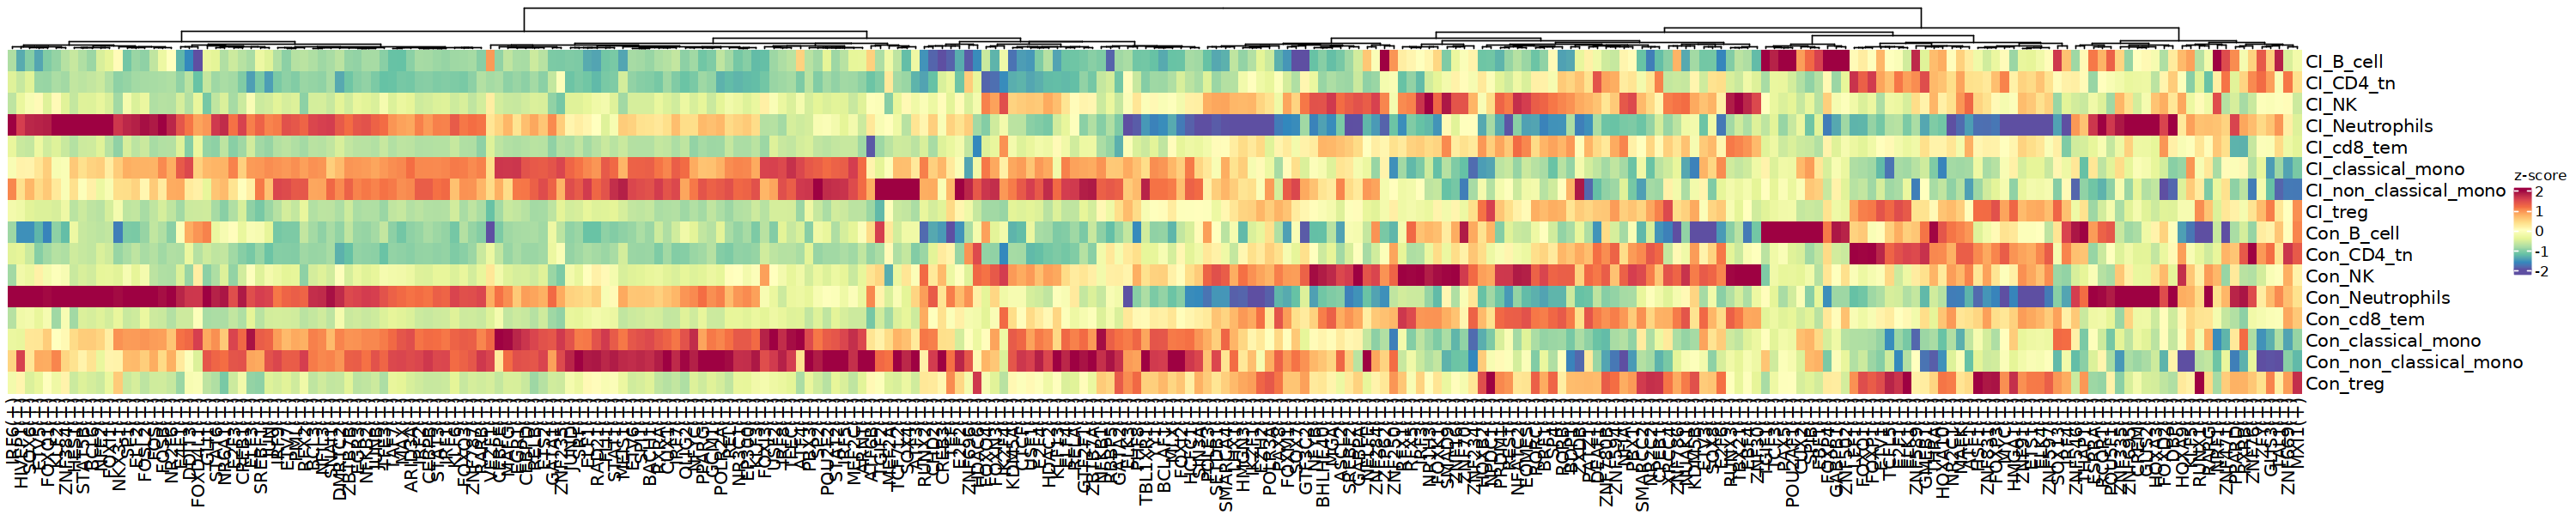

In [30]:
Heatmap(
  t(regulonActivity_byGroup_Scaled),
  name                         = "z-score",
  col                          = colorRamp2(seq(from=-2,to=2,length=11),rev(brewer.pal(11, "Spectral"))),
  show_row_names               = TRUE,
  show_column_names            = TRUE,
  row_names_gp                 = gpar(fontsize = 12),
  clustering_method_rows = "ward.D2",
  clustering_method_columns = "ward.D2",
  row_title_rot                = 0,
  cluster_rows                 = FALSE,
    cluster_columns = TRUE,
  cluster_row_slices           = FALSE)

In [ ]:
exp<- read.table("./00_rawdata/exp.txt",sep = '\t',header = T,row.names = 1) 

sample = data.frame(sample = colnames(exp)) 

head(exp,2)

group =  read.csv(file = 'bulk.3.group.csv')

groupinfo = left_join(sample,group,by = 'sample')

groupinfo[is.na(groupinfo)]='control'

up = regulonActivity_byGroup_Scaled %>%  as.data.frame() %>% filter(Case > 0)

tf = gsub('\\(\\+\\)','',rownames(up))

exp1 =exp[tf,] %>% na.omit()

control = groupinfo %>% tibble::column_to_rownames(.,'sample') %>%  dplyr::filter(group == 'control') %>% rownames()

case = groupinfo %>% tibble::column_to_rownames(.,'sample') %>%  dplyr::filter(group != 'control') %>% rownames()

control_sample <- exp1[,control]
case_sample <- exp1[,case]

exprSet_by_group <- cbind(case_sample,control_sample)
group_list <- c(rep('MDD',ncol(case_sample)),rep('Control',ncol(control_sample)))

data = exprSet_by_group

group_list = factor(group_list)
design <- model.matrix(~0+group_list)
rownames(design) = colnames(data)
colnames(design) <- levels(group_list)

library(limma)
library(edgeR)

DGElist <- DGEList( counts = data, group = group_list )
keep_gene <- rowSums( cpm(DGElist) > 1 ) >= 2 # 自定义
table(keep_gene)
DGElist <- DGElist[ keep_gene, , keep.lib.sizes = FALSE ]

DGElist <- calcNormFactors( DGElist )
v <- voom(DGElist, design, plot = TRUE, normalize = "quantile")
fit <- lmFit(v, design)
cont.matrix <- makeContrasts(contrasts = c('MDD-Control'), levels = design)

fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2)

nrDEG_limma_voom = topTable(fit2, coef = 'MDD-Control', n = Inf)
nrDEG_limma_voom = na.omit(nrDEG_limma_voom)
head(nrDEG_limma_voom)

padj = 0.05 # 自定义
foldChange= 0 # 自定义
nrDEG_limma_voom_signif = nrDEG_limma_voom[(nrDEG_limma_voom$P.Value	 < padj & 
                          (nrDEG_limma_voom$logFC>foldChange | nrDEG_limma_voom$logFC<(-foldChange))),]
nrDEG_limma_voom_signif = nrDEG_limma_voom_signif[order(nrDEG_limma_voom_signif$logFC),]

nrDEG_limma_voom_signif

exp2 = exp1[rownames(nrDEG_limma_voom_signif),] %>%  t() %>%  as.data.frame() %>%  
tibble::rownames_to_column(.,'sample')

exp3 = merge(exp2,groupinfo) %>%  tibble::column_to_rownames(.,'sample')

head(exp3,2)

library(ggpubr)

options(repr.plot.width = 12,repr.plot.height = 8)

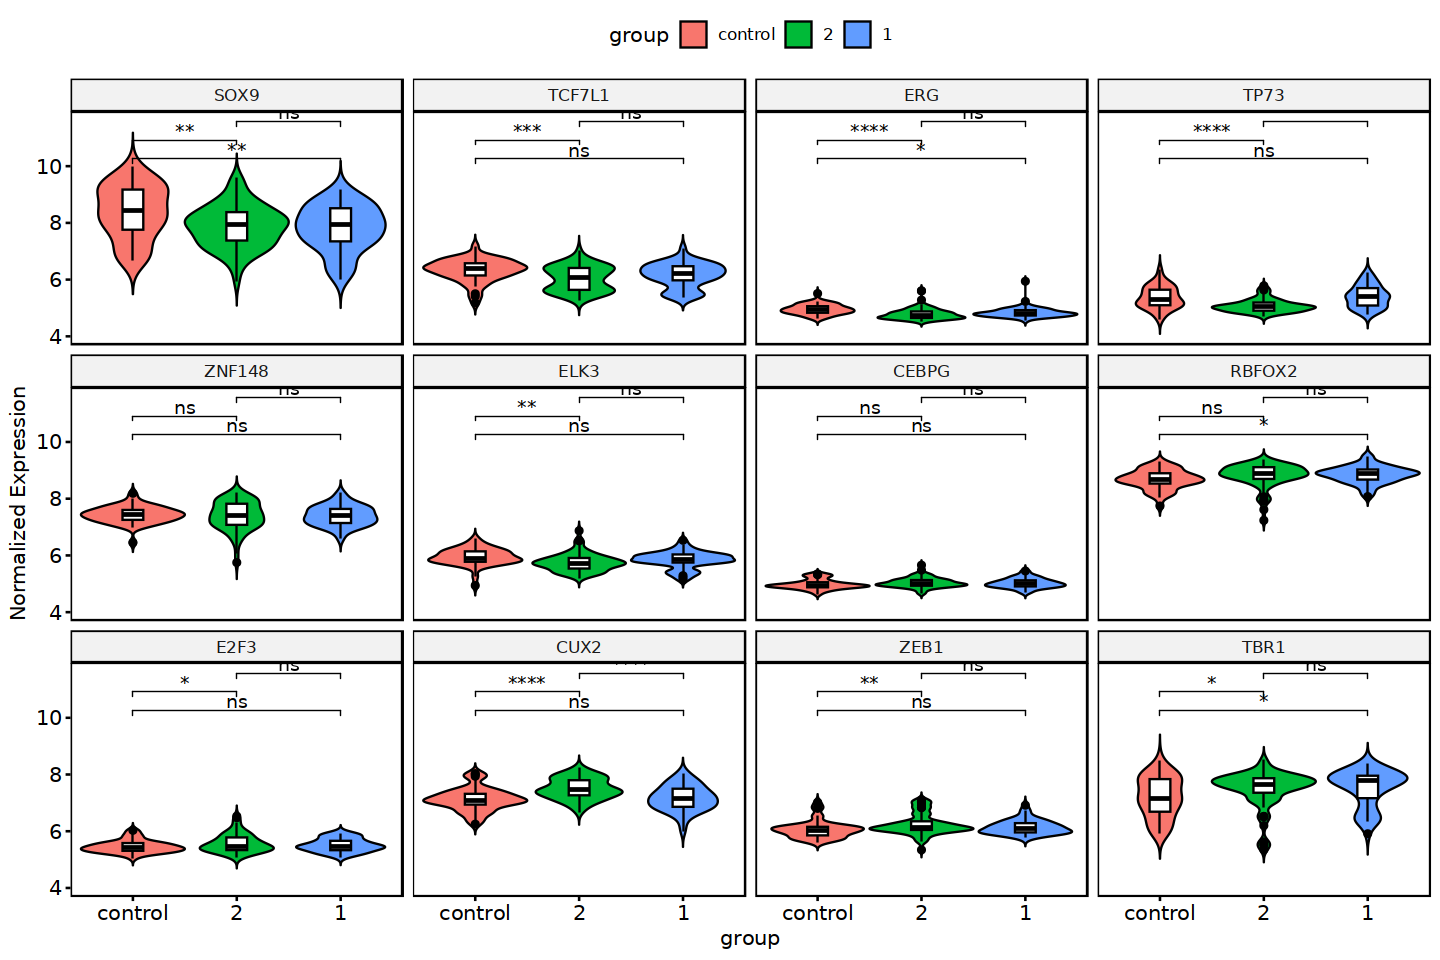

In [128]:
my_comparisons <- list( c("control", "1"),c("control", "2"),c("1", "2"))##分组设定
e<-exp3 %>% 
  ggviolin(x = "group", y = c(colnames(exp3)[1:12]), fill = "group",
           combine = T,
         #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##颜色设置
         ylab="Normalized Expression",
         add = "boxplot", add.params = list(fill = "white"))
e+stat_compare_means(method = "t.test",
                     label = "p.signif",##星号设置
                     comparisons = my_comparisons)

## 下调基因

,GSM1124358,GSM1124359,GSM1124360,GSM1124361,GSM1124362,GSM1124363,GSM1124364,GSM1124365,GSM1124366,GSM1124367,...,GSM1124509,GSM1124510,GSM1124511,GSM1124512,GSM1124513,GSM1124514,GSM1124515,GSM1124516,GSM1124517,GSM1124518
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZYX,8.951058,8.910902,8.922710,8.757089,8.917910,8.542830,8.563200,9.117089,8.842577,7.433112,...,8.082359,8.091963,8.181687,8.052719,8.214469,8.159618,8.284029,7.945729,8.266994,7.998448
ZG16,5.222460,5.306433,4.944275,5.373616,5.137519,5.406326,5.436243,5.040160,5.249018,5.458999,...,5.327078,5.240401,5.242680,5.249532,5.195299,5.286695,5.106508,5.759360,5.159166,4.990552


keep_gene
TRUE 
  53 

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JUND,0.04149634,14.49853,4.054480,7.756067e-05,0.004110716,0.8228165
CBFB,-0.03795125,14.51892,-3.596906,4.261726e-04,0.009136643,-0.7285481
BCL6,-0.03098737,14.63253,-3.542223,5.171684e-04,0.009136643,-0.8168331
EGR3,0.06613919,14.69807,3.414006,8.071355e-04,0.010694545,-1.2153973
ATF6,0.03574617,14.73844,2.833844,5.178764e-03,0.041488175,-2.8744111
MYC,-0.02085767,14.14533,-2.829318,5.249040e-03,0.041488175,-3.3560740


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NFIL3,-0.04091342,14.27027,-2.178623,3.079069e-02,0.090661479,-4.8019343
CBFB,-0.03795125,14.51892,-3.596906,4.261726e-04,0.009136643,-0.7285481
CEBPD,-0.03376872,14.74175,-2.468854,1.458254e-02,0.074785785,-3.7852346
BCL6,-0.03098737,14.63253,-3.542223,5.171684e-04,0.009136643,-0.8168331
SUPT20H,-0.02466711,14.52562,-2.354110,1.975474e-02,0.074785785,-4.2156893
IRF1,-0.02447907,14.28532,-2.194804,2.958680e-02,0.090661479,-4.7617050
MYC,-0.02085767,14.14533,-2.829318,5.249040e-03,0.041488175,-3.3560740
TCF7,-0.01638307,14.17463,-2.399852,1.752526e-02,0.074785785,-4.4178706
RUNX3,-0.01551651,14.13958,-2.363572,1.927408e-02,0.074785785,-4.5219855


,NFIL3,CBFB,CEBPD,BCL6,SUPT20H,IRF1,MYC,TCF7,RUNX3,GATA3,CREM,EGR1,RCOR1,NR2F2,ATF6,JUND,EGR2,EGR3,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GSM1124358,9.603829,7.947756,11.292998,9.823398,8.012730,9.362654,6.093087,5.536072,5.408643,4.406183,6.570924,7.750242,5.052424,5.389392,8.076808,7.080012,4.636734,8.065192,control
GSM1124359,5.967309,6.956525,7.948565,7.895006,7.420107,5.628243,5.174091,5.440383,5.262742,4.441831,6.362926,8.116920,5.525245,5.627236,8.173187,7.710617,5.232734,8.905638,2


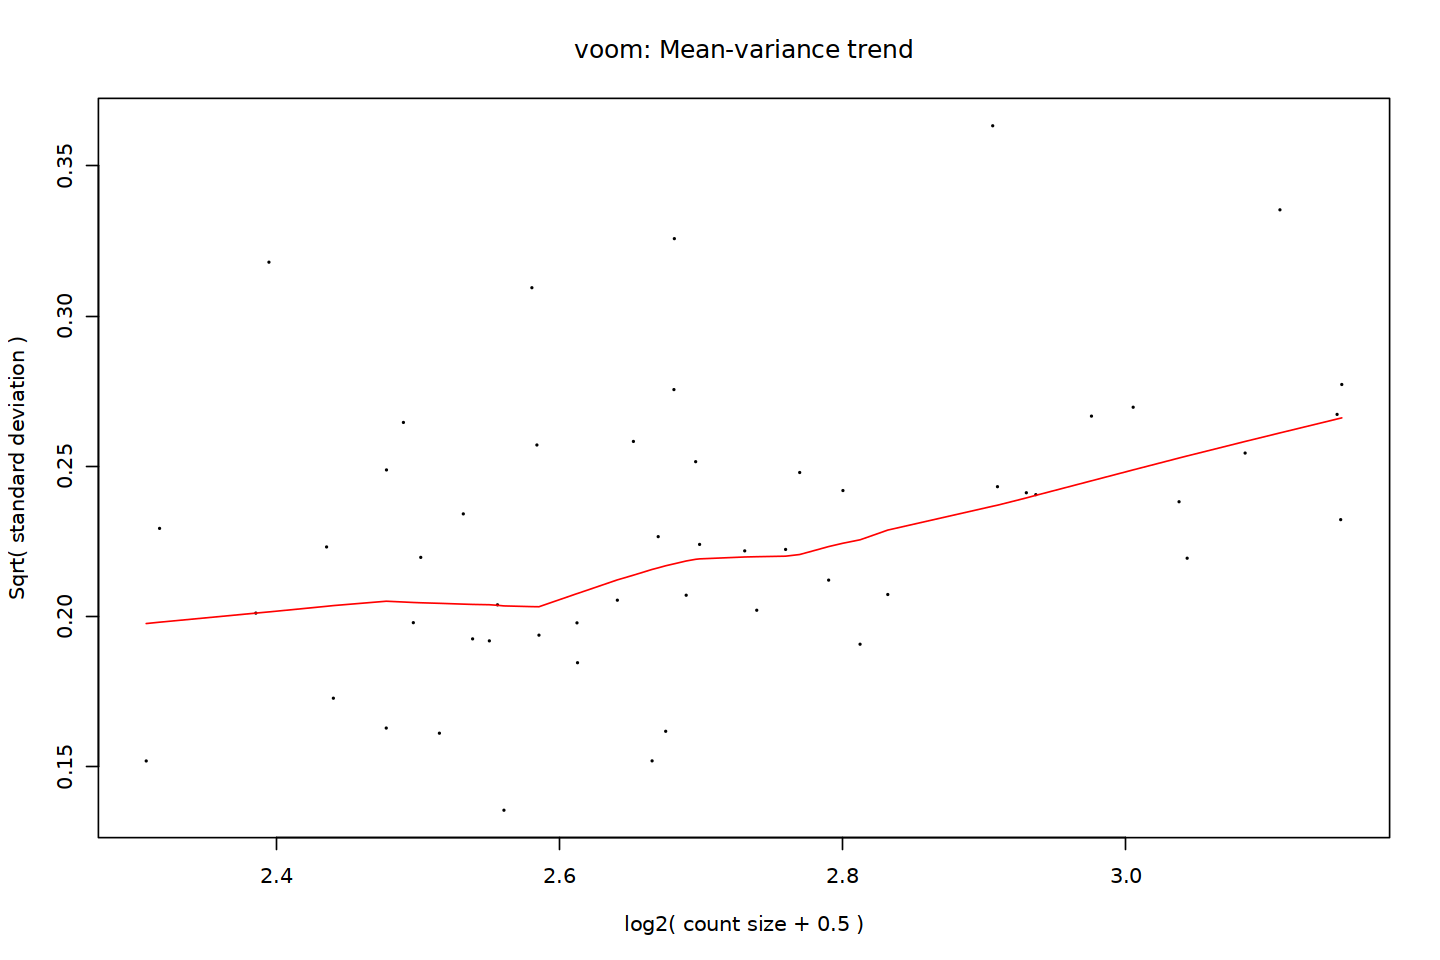

In [129]:
exp<- read.table("./00_rawdata/exp.txt",sep = '\t',header = T,row.names = 1) 

sample = data.frame(sample = colnames(exp)) 

head(exp,2)

group =  read.csv(file = 'bulk.3.group.csv')

groupinfo = left_join(sample,group,by = 'sample')

groupinfo[is.na(groupinfo)]='control'

up = regulonActivity_byGroup_Scaled %>%  as.data.frame() %>% filter(Case < 0)

tf = gsub('\\(\\+\\)','',rownames(up))

exp1 =exp[tf,] %>% na.omit()

control = groupinfo %>% tibble::column_to_rownames(.,'sample') %>%  dplyr::filter(group == 'control') %>% rownames()

case = groupinfo %>% tibble::column_to_rownames(.,'sample') %>%  dplyr::filter(group != 'control') %>% rownames()

control_sample <- exp1[,control]
case_sample <- exp1[,case]

exprSet_by_group <- cbind(case_sample,control_sample)
group_list <- c(rep('MDD',ncol(case_sample)),rep('Control',ncol(control_sample)))

data = exprSet_by_group

group_list = factor(group_list)
design <- model.matrix(~0+group_list)
rownames(design) = colnames(data)
colnames(design) <- levels(group_list)

library(limma)
library(edgeR)

DGElist <- DGEList( counts = data, group = group_list )
keep_gene <- rowSums( cpm(DGElist) > 1 ) >= 2 # 自定义
table(keep_gene)
DGElist <- DGElist[ keep_gene, , keep.lib.sizes = FALSE ]

DGElist <- calcNormFactors( DGElist )
v <- voom(DGElist, design, plot = TRUE, normalize = "quantile")
fit <- lmFit(v, design)
cont.matrix <- makeContrasts(contrasts = c('MDD-Control'), levels = design)

fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2)

nrDEG_limma_voom = topTable(fit2, coef = 'MDD-Control', n = Inf)
nrDEG_limma_voom = na.omit(nrDEG_limma_voom)
head(nrDEG_limma_voom)

padj = 0.05 # 自定义
foldChange= 0 # 自定义
nrDEG_limma_voom_signif = nrDEG_limma_voom[(nrDEG_limma_voom$P.Value	 < padj & 
                          (nrDEG_limma_voom$logFC>foldChange | nrDEG_limma_voom$logFC<(-foldChange))),]
nrDEG_limma_voom_signif = nrDEG_limma_voom_signif[order(nrDEG_limma_voom_signif$logFC),]

nrDEG_limma_voom_signif

exp2 = exp1[rownames(nrDEG_limma_voom_signif),] %>%  t() %>%  as.data.frame() %>%  
tibble::rownames_to_column(.,'sample')

exp3 = merge(exp2,groupinfo) %>%  tibble::column_to_rownames(.,'sample')

head(exp3,2)

library(ggpubr)

options(repr.plot.width = 12,repr.plot.height = 8)

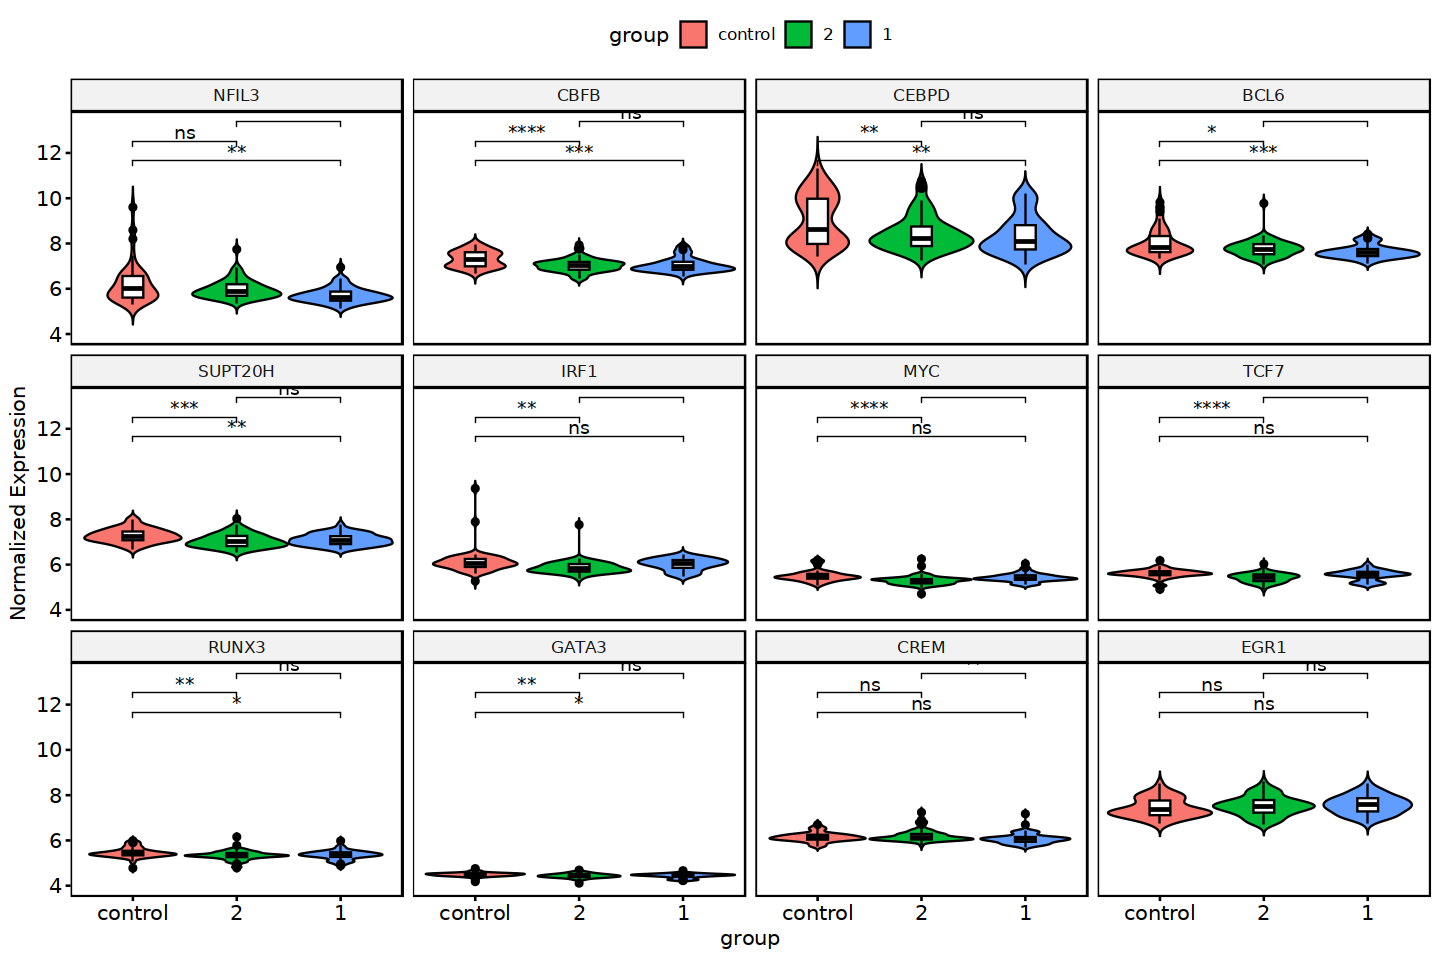

In [130]:
my_comparisons <- list( c("control", "1"),c("control", "2"),c("1", "2"))##分组设定
e<-exp3 %>% 
  ggviolin(x = "group", y = c(colnames(exp3)[1:12]), fill = "group",
           combine = T,
         #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##颜色设置
         ylab="Normalized Expression",
         add = "boxplot", add.params = list(fill = "white"))
e+stat_compare_means(method = "t.test",
                     label = "p.signif",##星号设置
                     comparisons = my_comparisons)